In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dateutil

# This code is written by Nadia A
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
nyc_rental_load = "Resources/Neighborhood_Zri_AllHomesPlusMultifamily.csv"
nyc_rental_data=pd.read_csv(nyc_rental_load)
nyc_mean_price_sales = "Resources/nyc_mean_price_per_sqft.csv"
nyc_price_per_sqft = pd.read_csv(nyc_mean_price_sales)
nyc_crime_load = "Resources/nyc_clean_crime_data.csv"
nyc_crime_data=pd.read_csv(nyc_crime_load)

In [2]:
nyc_price_per_sqft.dropna().head()

,Date,Manhattan price per sqft,Brooklyn price per sqft,Bronx price per sqft,Queens price per sqft,Staten Island price per sqft
0,1996-04,276.681818,132.024390,114.000000,128.593220,116.145833
1,1996-05,277.863636,132.048780,114.000000,128.779661,115.812500
2,1996-06,279.000000,131.902439,113.722222,129.050847,115.562500
3,1996-07,279.863636,131.853659,113.722222,129.288136,115.229167
4,1996-08,280.818182,132.000000,113.388889,129.745763,114.895833


In [3]:
nyc_price_per_sqft.rename(index=str, columns={"Manhattan price per sqft": "Average Manhattan price per sqft", 
                                              "Brooklyn price per sqft": "Average Brooklyn price per sqft",
                                             "Bronx price per sqft": "Average Bronx price per sqft",
                                             "Queens price per sqft	": "Average Queens price per sqft	",
                                             "Staten Island price per sqft": "Average Staten Island price per sqft"})

,Date,Average Manhattan price per sqft,Average Brooklyn price per sqft,Average Bronx price per sqft,Queens price per sqft,Average Staten Island price per sqft
0,1996-04,276.681818,132.024390,114.000000,128.593220,116.145833
1,1996-05,277.863636,132.048780,114.000000,128.779661,115.812500
2,1996-06,279.000000,131.902439,113.722222,129.050847,115.562500
3,1996-07,279.863636,131.853659,113.722222,129.288136,115.229167
4,1996-08,280.818182,132.000000,113.388889,129.745763,114.895833
5,1996-09,282.000000,132.097561,112.944444,130.135593,114.708333
6,1996-10,283.136364,132.390244,112.666667,130.406780,114.479167
7,1996-11,284.409091,132.707317,112.388889,131.000000,114.395833
8,1996-12,285.954545,133.292683,112.277778,131.559322,114.312500
9,1997-01,288.045455,133.829268,112.222222,132.016949,114.666667


In [4]:
df_date = nyc_price_per_sqft['Date'].str.split('-',expand=True)

In [5]:
nyc_price_per_sqft = nyc_price_per_sqft.join(df_date, how='inner')

In [6]:
nyc_price_per_sqft = nyc_price_per_sqft.dropna()
nyc_price_per_sqft.head()

,Date,Manhattan price per sqft,Brooklyn price per sqft,Bronx price per sqft,Queens price per sqft,Staten Island price per sqft,0,1
0,1996-04,276.681818,132.024390,114.000000,128.593220,116.145833,1996,04
1,1996-05,277.863636,132.048780,114.000000,128.779661,115.812500,1996,05
2,1996-06,279.000000,131.902439,113.722222,129.050847,115.562500,1996,06
3,1996-07,279.863636,131.853659,113.722222,129.288136,115.229167,1996,07
4,1996-08,280.818182,132.000000,113.388889,129.745763,114.895833,1996,08


In [7]:
nyc_price_per_sqft = nyc_price_per_sqft.reset_index()

In [8]:
nyc_price_per_sqft.head()

,index,Date,Manhattan price per sqft,Brooklyn price per sqft,Bronx price per sqft,Queens price per sqft,Staten Island price per sqft,0,1
0,0,1996-04,276.681818,132.024390,114.000000,128.593220,116.145833,1996,04
1,1,1996-05,277.863636,132.048780,114.000000,128.779661,115.812500,1996,05
2,2,1996-06,279.000000,131.902439,113.722222,129.050847,115.562500,1996,06
3,3,1996-07,279.863636,131.853659,113.722222,129.288136,115.229167,1996,07
4,4,1996-08,280.818182,132.000000,113.388889,129.745763,114.895833,1996,08


In [9]:
nyc_price_per_sqft = nyc_price_per_sqft.drop(columns=['index','Date'])

In [10]:
nyc_price_per_sqft

,Manhattan price per sqft,Brooklyn price per sqft,Bronx price per sqft,Queens price per sqft,Staten Island price per sqft,0,1
0,276.681818,132.024390,114.000000,128.593220,116.145833,1996,04
1,277.863636,132.048780,114.000000,128.779661,115.812500,1996,05
2,279.000000,131.902439,113.722222,129.050847,115.562500,1996,06
3,279.863636,131.853659,113.722222,129.288136,115.229167,1996,07
4,280.818182,132.000000,113.388889,129.745763,114.895833,1996,08
5,282.000000,132.097561,112.944444,130.135593,114.708333,1996,09
6,283.136364,132.390244,112.666667,130.406780,114.479167,1996,10
7,284.409091,132.707317,112.388889,131.000000,114.395833,1996,11
8,285.954545,133.292683,112.277778,131.559322,114.312500,1996,12
9,288.045455,133.829268,112.222222,132.016949,114.666667,1997,01


In [11]:
df = nyc_price_per_sqft.rename(columns={0:'Year'})

In [12]:
df.head()

,Manhattan price per sqft,Brooklyn price per sqft,Bronx price per sqft,Queens price per sqft,Staten Island price per sqft,Year,1
0,276.681818,132.024390,114.000000,128.593220,116.145833,1996,04
1,277.863636,132.048780,114.000000,128.779661,115.812500,1996,05
2,279.000000,131.902439,113.722222,129.050847,115.562500,1996,06
3,279.863636,131.853659,113.722222,129.288136,115.229167,1996,07
4,280.818182,132.000000,113.388889,129.745763,114.895833,1996,08


In [13]:
df_by_year = df.groupby(['Year']).mean()

In [14]:
df_by_year

,Manhattan price per sqft,Brooklyn price per sqft,Bronx price per sqft,Queens price per sqft,Staten Island price per sqft
Year,,,,,
1996,281.080808,132.257453,113.234568,129.839925,115.060185
1997,296.143939,135.613821,112.930556,133.892655,115.314236
1998,325.806818,145.113821,116.055556,142.540960,120.279514
1999,378.333333,161.662602,124.106481,157.764124,131.298611
2000,453.992424,185.081301,136.930556,179.105932,149.173611
2001,523.844697,213.095528,154.180556,200.511299,170.201389
2002,555.712121,236.953252,174.013889,218.475989,192.630208
2003,619.439394,278.776423,194.231481,258.347458,220.064236
2004,703.810000,337.810078,221.872807,300.522599,246.154514


In [19]:
#df_by_year_short = df_by_year.loc[df_by_year['Year'].isin(['2011','2012','2013','2014','2015','2016','2017'])])
df_by_year_short = df_by_year.loc[df_by_year.index.isin(['2012','2013','2014','2015','2016','2017'])]
df_by_year1 = df_by_year_short.rename(index=str, columns={"Manhattan price per sqft": "Average Manhattan price per sqft", 
                                              "Brooklyn price per sqft": "Average Brooklyn price per sqft",
                                             "Bronx price per sqft": "Average Bronx price per sqft",
                                             "Queens price per sqft	": "Average Queens price per sqft",
                                             "Staten Island price per sqft": "Average Staten Island price per sqft"})

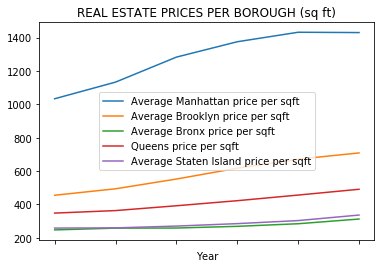

In [32]:
df_by_year1.plot(kind='line', title="REAL ESTATE PRICES PER BOROUGH (sq ft)")
plt.legend(loc='best')

In [17]:
#real_estate_chart.set_xlabel('Years')
#real_estate_chart.set_title('REAL ESTATE PRICES PER BORO (sq ft)')
#real_estate_chart.set_ylabel('Real Estate prices per sq ft')

In [18]:
plt.show()